# Desafios da Primeira Aula - Análise do MovieLens

## Datasets utilizados

In [0]:
import pandas as pd

#filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv')
filmes = pd.read_csv('movies.csv')
filmes.columns = ['filmeId', 'titulo', 'genero']
#avaliacoes = pd.read_csv('https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true')
avaliacoes = pd.read_csv('ratings.csv')
avaliacoes.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

## Desafio 1

Encontre os 18 filmes que não tiveram avaliação

In [46]:
notas_medias_por_filme = avaliacoes.groupby('filmeId')['nota'].mean()
filmes_com_media = filmes.join(notas_medias_por_filme, on='filmeId')
# filmes_com_media.columns = ['filmeId', 'titulo', 'genero', 'notaMedia']
filmes_com_media = filmes_com_media.rename(columns={'nota':'notaMedia'})

filmes_sem_nota = pd.isnull(filmes_com_media['notaMedia'])

# Da lista de filmes com média retorna somente as entradas sem nota
filmes_com_media[filmes_sem_nota]

,filmeId,titulo,genero,notaMedia
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


## Desafio 2

Mudar o nome da coluna nota para notaMedia.

Já feito

## Desafio 3

Colocar o número de avaliações por filme

In [47]:
# Precisamos agrupar as notas por filme, para contarmos quantas notas foram
# dadas
quant_notas = avaliacoes.groupby('filmeId')['nota'].count()
filmes_com_quant_notas = filmes_com_media.join(quant_notas, on='filmeId')
filmes_com_quant_notas = filmes_com_quant_notas.rename(columns={'nota':'quantNotas'})
filmes_com_quant_notas.head()

,filmeId,titulo,genero,notaMedia,quantNotas
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


In [48]:
# Comprovando o resultado anterior para o filme com filmeId == 2
len(avaliacoes.query('filmeId == 2'))

110

## Desafio 4

Arredondar as médias

In [49]:
filmes_com_quant_notas['notaMedia'] = filmes_com_quant_notas['notaMedia'].round(2)
filmes_com_quant_notas.head()

,filmeId,titulo,genero,notaMedia,quantNotas
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0


## Desafio 5

Descobrir quais são os gêneros dos filmes

In [50]:
df_generos = filmes['genero'].str.get_dummies('|')
lista_generos = df_generos.columns.to_list()
lista_generos

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

## Desafio 6:

Contar o número de aparições de cada genero.

In [51]:
total_filmes_por_genero = filmes['genero'].str.get_dummies('|').sum()
total_filmes_por_genero

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

## Desafio 7 do Guilherme Silveira

Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

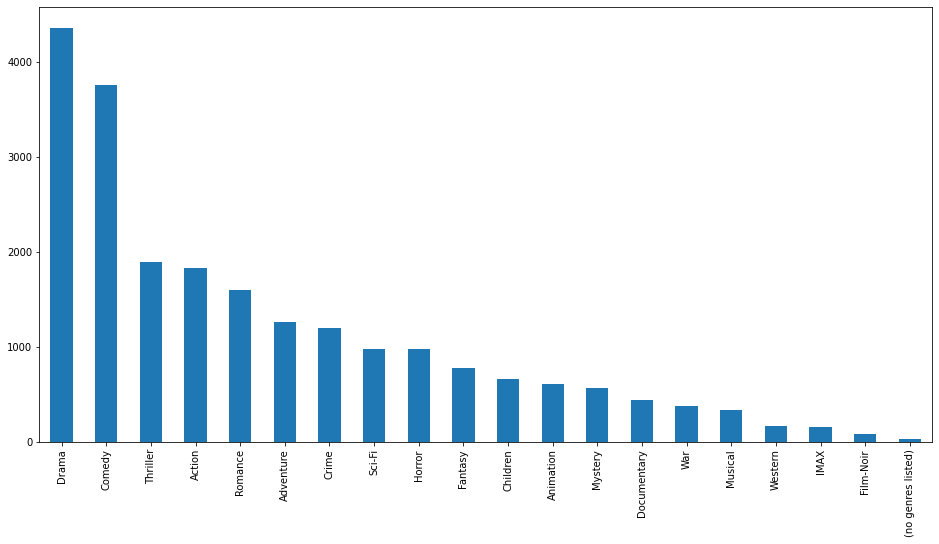

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
total_filmes_por_genero.sort_values(ascending=False).plot(kind='bar')
plt.show()